## Context of Data

Company-wide Employees E-Commerce purchase data

Customers - Most purchased ones are belongs to Dietitian, Lawyers professionals

Transactions purchase range on average of $50

Transaction purchase period all through 24hours

Results obtained from Exploratory Data Analysis (EDA)

<font color=blue>

1. The customer with the highest number of purchase comes from the Dietitian Professionals

2. 'Brown Ltd' company's employees have purchased most values as $796.38

3. The TOP 5 companies employees placed the highest number of purchases as below:

        Brown Ltd
        Williams LLC
        Smith LLC
        Smith PLC
        Johnson Ltd

4. The TOP purchased customer brownsarah@gmail.com with the value as $198.83

5. The Top 5 customer's purchases are
        brownsarah@gmail.com    ==> $198.83
        wjohnson@yahoo.com      ==> $175.61
        cgray@gmail.com         ==> $154.41
        lawrenceemily@yahoo.com ==> $154.31
        wilsonjohn@yahoo.com    ==> $153.36

6. The highest number of purchase are done in the evening(PM)

7. The highest number of purchase are done by [ru] language customers

8. Majority of the customers(around 79.2%) customers are using Mozilla for browsing and to purchase items
</font>

In [2]:
import numpy as np
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ecom = pd.read_csv('Ecommerce_Purchases.csv')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [4]:
ecom['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

In [5]:
# People who have English 'en' as their Language of choice on the website

ecom[ecom['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [6]:
#count number of transacations in AM and PM
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [7]:
#top five jobs
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Research officer, political party    27
Name: Job, dtype: int64

In [8]:
#top five email providers
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [9]:

selected_columns = ecom[['AM or PM', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price']]

cleaned_ecom = selected_columns.copy()

In [10]:
#clean up address
address = ecom['Address'].str.extract(r",*\W*([A-Z]{2}\W+[0-9\-]*)$", expand = False)
address = address.str.split(pat=r"\W|\-", expand = True)

In [11]:
#clean browser
browser = ecom['Browser Info'].str.split(pat=r" |\(|\)", expand = True)
browser_and_ver = browser[0].str.split(pat=r"/", expand = True)

In [12]:
cleaned_ecom['Browser'] = browser_and_ver[0]
cleaned_ecom['Browser Version'] = browser_and_ver[1]
cleaned_ecom['CC Exp Year'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[1].astype(int)
cleaned_ecom['CC Exp Month'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[0].astype(int)
cleaned_ecom['State'] =   address[0]
cleaned_ecom['ZIP Code'] =   address[1]
cleaned_ecom['ZIP Code'] = cleaned_ecom['ZIP Code'].astype(int)
cleaned_ecom['CC Provider'] = cleaned_ecom['CC Provider'].str.split(pat = '\d', expand = True)[0]
cleaned_ecom.nunique() #There are 10000 different credit cards registered and 10000 different IP addresses
#but interestingly not 10000 different email addresses. Hence email address is not used to maintain user account 

AM or PM                2
Company              8653
Credit Card         10000
CC Exp Date           121
CC Security Code     1758
CC Provider             8
Email                9954
Job                   623
IP Address          10000
Language                9
Purchase Price       6349
Browser                 2
Browser Version       181
CC Exp Year            11
CC Exp Month           12
State                  62
ZIP Code             9543
dtype: int64

In [13]:
# Write contents of the DataFrame to a CSV file

#newcsvFileName = 'New_Ecommerce_Purchases.csv'

#new_ecom.to_csv(newcsvFileName,index=False);

In [14]:
cleaned_ecom = cleaned_ecom.drop_duplicates() #drop duplicates if any
cleaned_ecom

,AM or PM,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Browser Version,CC Exp Year,CC Exp Month,State,ZIP Code
0,PM,Martinez-Herman,6011929061123406,02/20,900,JCB,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,9.56.,20,2,NE,77130
1,PM,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,8.93.,18,11,TN,84355
2,PM,"Simpson, Williams and Pham",675957666125,08/19,699,JCB,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Mozilla,5.0,19,8,AP,27450
3,PM,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mozilla,5.0,24,2,WA,45798
4,AM,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Opera,9.58.,25,10,TX,57826
5,PM,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15,Mozilla,5.0,25,7,VA,30493
6,AM,Gibson and Sons,6011398782655569,07/24,714,VISA,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56,Mozilla,5.0,24,7,AZ,75107
7,PM,Marshall-Collins,561252141909,06/25,256,VISA,phillip48@parks.info,Event organiser,224.247.97.150,pt,44.25,Mozilla,5.0,25,6,WV,24804
8,PM,Galloway and Sons,180041795790001,04/24,899,JCB,kdavis@rasmussen.com,Financial manager,146.234.201.229,ru,59.54,Mozilla,5.0,24,4,ME,28650
9,AM,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63,Mozilla,5.0,17,1,ID,88739


In [15]:
cleaned_ecom.describe()

,Credit Card,CC Security Code,Purchase Price,CC Exp Year,CC Exp Month,ZIP Code
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.341374e+15,907.217800,50.347302,21.173100,6.42570,49808.190700
std,2.256103e+15,1589.693035,29.015836,2.918114,3.46648,28965.375251
min,6.040186e+10,0.000000,0.000000,16.000000,1.00000,29.000000
25%,3.056322e+13,280.000000,25.150000,19.000000,3.00000,24745.000000
50%,8.699942e+14,548.000000,50.505000,21.000000,6.00000,49695.000000
75%,4.492298e+15,816.000000,75.770000,24.000000,9.00000,75011.250000
max,6.012000e+15,9993.000000,99.990000,26.000000,12.00000,99994.000000


In [16]:

class DataFrameWithImputor():
    def __init__(self,df):
        self.df=df
        
    def get_data_frame(self):
        return self.df
    
       
    #Randomly find indexes for x% of the column to populate with NaN values
    def introduce_errors(self, attribute, percent):
        column = self.df[attribute]
        error_data = int(column.size * percent)
        i = [random.choice(range(column.shape[0])) for _ in range(error_data)]
        column[i] = np.NaN
        self.df[attribute] = column
        return len(set(i)) # lengh of error indexes
    
    #Randomly find indexes for x% of the cells to populate with NaN values
    def introduce_errors_in_dataframe(self, percent):
        rows = len(self.df.index)
        error_data = int(rows * percent)
        columns = len(self.df.columns)
        for i in range(error_data):
            col = i  % columns
            row = i % rows
            self.df.iloc[row,col] = np.NaN
        return self.df.isnull().sum().sum()



    def impute(self,column,value):
        #Impute NaN values in the column with a random value

        null_values = self.df[self.df[column].isnull()].index

        for i in range(len(null_values)):
            self.df[column][null_values]  = value

        col_description = pd.DataFrame(self.df[column].describe())
        col_description.loc['Frequent'] = self.df[column].value_counts().idxmax()
        return col_description

    def get_nan_count(self):
        return self.df.isnull().sum()
    
    
    def find_empty_string(self):
        return np.where(self.df.applymap(lambda x: x == '')) # return rows with empty string
    
    def nan_values_in_column(self):
        return np.where(pd.isnull(self.df)) #return indexes for null values in a row
    
    def describe(self):
        return self.df.describe
    
    def describe_col(self, col):
        desc = pd.DataFrame(self.df[col].describe())
        
        desc.loc['Frequent'] = self.df[col].value_counts().idxmax()
        return desc
    
    def fillforward(self):
        self.df = self.df.fillna(method='ffill',axis = 0)
        
     
    def fillbackward(self):
        self.df = self.df.fillna(method='bfill',axis = 0)
        
        
   
        

In [17]:
unimputed = DataFrameWithImputor(cleaned_ecom) 
if len(unimputed.find_empty_string()) > 2:
    print('Empty strings in the data frame')
    
if len(unimputed.nan_values_in_column()) > 2:
    print('NaN in the data frame')
    

In [18]:
 def do_imputation(df,column,error_rate,condition = None  ):
        
        imp = DataFrameWithImputor(df.copy()) 

        imp.introduce_errors(column,error_rate)
        
        if condition != None:
            imp.impute(column,condition)
        else:
            #Impute through backfill and forwardfill
            imp.fillbackward()
            imp.fillforward()
        
        return imp
    
    

In [19]:
#####
#  Mean imputation
#####

mean_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].mean())


#####
#  Median imputation
#####
#Impute NaN values in the column with the median


median_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].median())

#####
#  Random imputation
#####

random_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1,random.choice(range(1,99))) 

#####
#  Impute with constant
#####

const_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, 50)

#Forward and backward fill to impute data
#
#
fill_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1) 



C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
fill_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.275886
std,29.081246
min,0.000000
25%,24.912500
50%,50.430000
75%,75.840000
max,99.990000
Frequent,20.240000


In [21]:
const_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.233356
std,27.559548
min,0.000000
25%,27.757500
50%,50.000000
75%,72.742500
max,99.990000
Frequent,50.000000


In [22]:
median_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.263656
std,27.572911
min,0.000000
25%,27.687500
50%,50.505000
75%,72.755000
max,99.990000
Frequent,50.505000


In [23]:
random_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,46.877831
std,29.431812
min,0.000000
25%,17.275000
50%,45.065000
75%,72.502500
max,99.990000
Frequent,15.000000


In [24]:
mean_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.205009
std,27.535415
min,0.000000
25%,27.787500
50%,50.347302
75%,72.640000
max,99.990000
Frequent,50.347302


In [25]:
unimputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000
Frequent,49.730000


In [26]:
df = mean_imputed.get_data_frame()


In [76]:
jobCount = df['Job'].value_counts().rename_axis('Job').reset_index(name='Count')
jobPurchase= df.groupby('Job')['Purchase Price'].sum().rename_axis('Job').reset_index()
#Map the number of people of a particular Job to the amount the Job type is spending
jobPurchase.merge(jobCount, on='Job', how = 'inner' ).sort_values(by ='Purchase Price', ascending = False).head()
#We can see that the dietian is one of the most populous job designation, hence it is the group that spends the most 

,Job,Purchase Price,Count
473,Purchasing manager,1548.839208,27
325,Lawyer,1525.481906,30
158,Dietitian,1525.421906,26
589,"Therapist, art",1482.304604,25
151,"Designer, jewellery",1482.200000,27


In [27]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()#group by Job and sort by total purchase amount

res1= job.sort_values(by='Purchase Price', ascending=False).iloc[:10,:] 
res1 #On first sight it looks like dietitian is the designation that is spending the most amount

,Job,Purchase Price
473,Purchasing manager,1548.839208
325,Lawyer,1525.481906
158,Dietitian,1525.421906
589,"Therapist, art",1482.304604
151,"Designer, jewellery",1482.200000
489,"Research officer, political party",1438.079208
312,Interior and spatial designer,1425.524604
101,Clinical cytogeneticist,1416.484604
384,Network engineer,1412.753812
146,"Designer, fashion/clothing",1410.887302


In [29]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].mean()
res2= job.sort_values(by='Purchase Price', ascending=False).iloc[:10,:]
res2
#Calculating the mean Purchase price by Job Designation
#We can see that Trade Mark attorney is the job type that makes the biggest ppurchases on avg

,Job,Purchase Price
602,Trade mark attorney,71.016118
606,Translator,69.045724
149,"Designer, industrial/product",68.411281
536,"Solicitor, Scotland",67.735522
18,Adult nurse,67.721922
461,"Psychologist, prison and probation services",67.501922
202,"Engineer, manufacturing systems",66.152279
315,Investment analyst,65.879460
280,Historic buildings inspector/conservation officer,65.224487
448,Production manager,65.202000


#### 1. Find the relationship between Job designation and Purchase amount

[Text(0, 0, 'Purchasing manager'),
 Text(0, 0, 'Lawyer'),
 Text(0, 0, 'Dietitian'),
 Text(0, 0, 'Therapist, art'),
 Text(0, 0, 'Designer, jewellery'),
 Text(0, 0, 'Research officer, political party'),
 Text(0, 0, 'Interior and spatial designer'),
 Text(0, 0, 'Clinical cytogeneticist'),
 Text(0, 0, 'Network engineer'),
 Text(0, 0, 'Designer, fashion/clothing')]

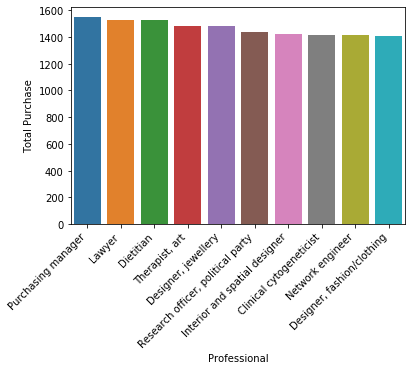

In [30]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Trade mark attorney'),
 Text(0, 0, 'Translator'),
 Text(0, 0, 'Designer, industrial/product'),
 Text(0, 0, 'Solicitor, Scotland'),
 Text(0, 0, 'Adult nurse'),
 Text(0, 0, 'Psychologist, prison and probation services'),
 Text(0, 0, 'Engineer, manufacturing systems'),
 Text(0, 0, 'Investment analyst'),
 Text(0, 0, 'Historic buildings inspector/conservation officer'),
 Text(0, 0, 'Production manager')]

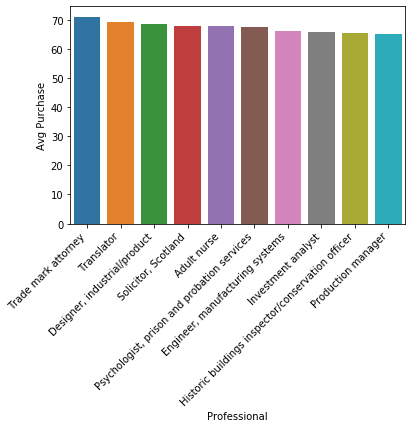

In [31]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res2)
ax.set(xlabel="Professional", ylabel = "Avg Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#### 2. Perform bi-variate analysis of Browser + Job against purshase amount

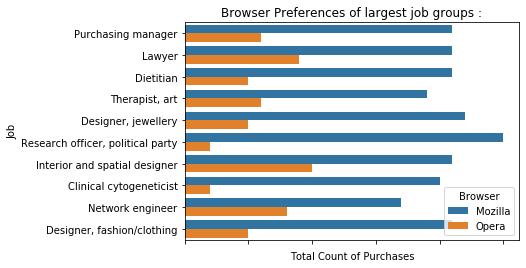

In [32]:
#Browser preferences of top 10 job types
jobBrowser = df.groupby(by=['Job', 'Browser'], as_index=False, )['Purchase Price'].count()
jobBrowser.sort_values(by='Purchase Price', ascending = False)#group by Job and sort by total purchase amount

plt.title(f"Browser Preferences of largest job groups :")
ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res1.merge(jobBrowser,on = 'Job' ,how = 'inner'))
ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


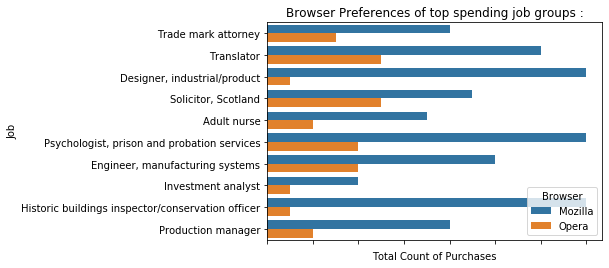

In [33]:
plt.title(f"Browser Preferences of top spending job groups :")
ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res2.merge(jobBrowser,on = 'Job' ,how = 'inner'))
ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### 3. How does purchase depend on location and time?

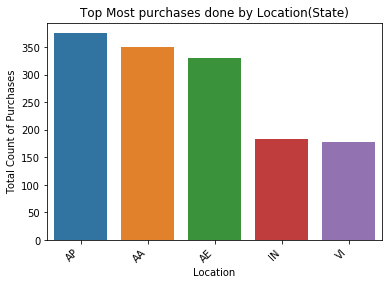

In [34]:
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
plt.title('Top Most purchases done by Location(State)')
ax = sns.barplot(x = "State", y = "Purchase Price", data = res)
ax.set(xlabel="Location", ylabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




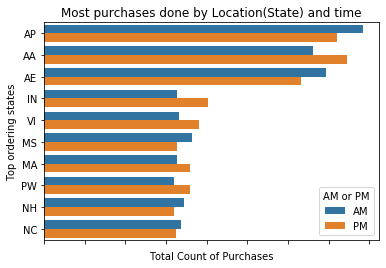

In [35]:
res=df.groupby(by='State', as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).iloc[:10,:]
res4=df.groupby(by=['State','AM or PM'], as_index=False)['Purchase Price'].count()
res4= res4.sort_values(by='Purchase Price', ascending=False)

plt.title('Most purchases done by Location(State) and time')
ax = sns.barplot(x = "Purchase Price_y", y = "State",hue="AM or PM" , orient = 'h', \
                 data = res.merge(res4, on = 'State', how = 'inner'))
ax.set(ylabel="Top ordering states", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

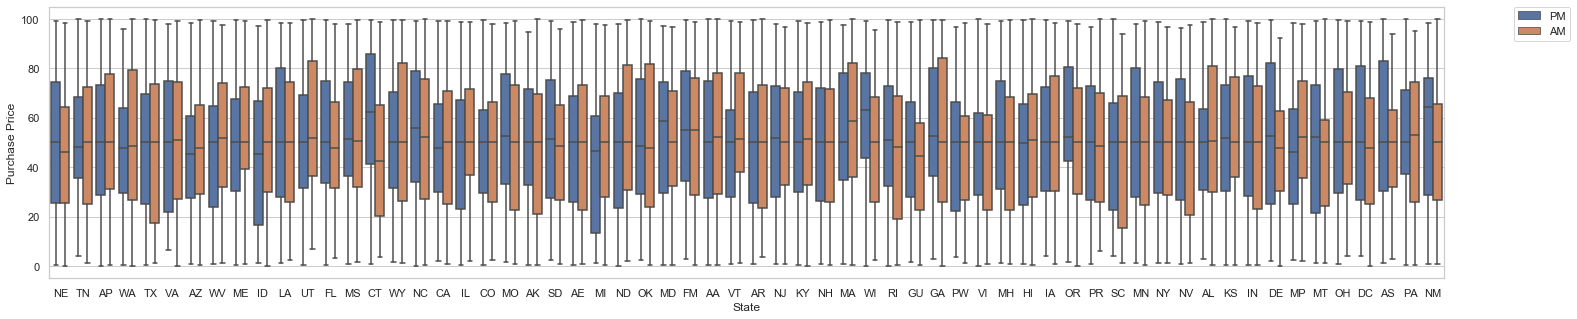

In [60]:
plt.figure(figsize=(25,5))
sns.boxplot(x='State',y='Purchase Price',data=df,hue='AM or PM')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [65]:
state_count = df.groupby(by=['State','AM or PM'],as_index=False)['Purchase Price'].count()
state_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
state_count_am = state_count[state_count['AM or PM']=='AM']
state_count_pm = state_count[state_count['AM or PM']=='PM']
state_count_merge = pd.merge(state_count_am,state_count_pm,left_on='State',right_on='State')
state_count_merge.rename(columns = {'Count of Purchases_x':'Count of AM Purchases','Count of Purchases_y':'Count of PM Purchases'},inplace=True)
state_count_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
state_count_merge['Ratio_AM_PM'] = state_count_merge['Count of AM Purchases']/state_count_merge['Count of PM Purchases']
state_count_merge_head = state_count_merge.sort_values(by='Ratio_AM_PM', ascending=False).head(5)
state_count_merge_tail = state_count_merge.sort_values(by='Ratio_AM_PM', ascending=True).head(5)

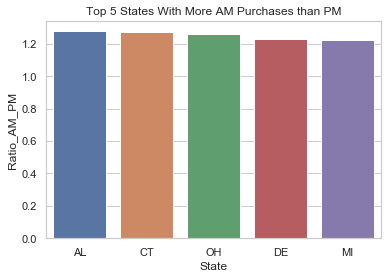

In [66]:
sns.barplot(x='State', y='Ratio_AM_PM',data=state_count_merge_head)
plt.title('Top 5 States With More AM Purchases than PM' )
plt.show()

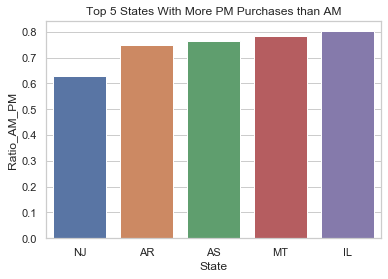

In [67]:
sns.barplot(x='State', y='Ratio_AM_PM',data=state_count_merge_tail)
plt.title('Top 5 States With More PM Purchases than AM' )
plt.show()

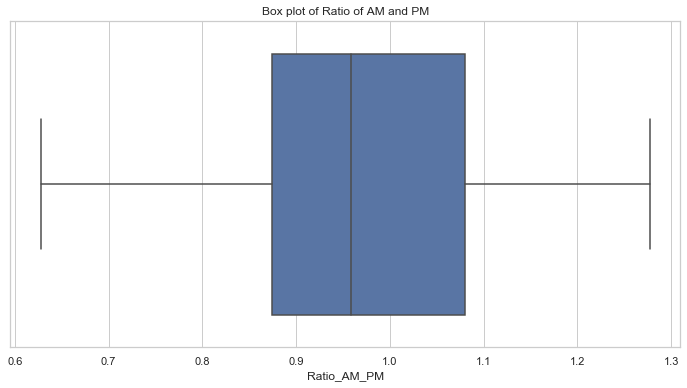

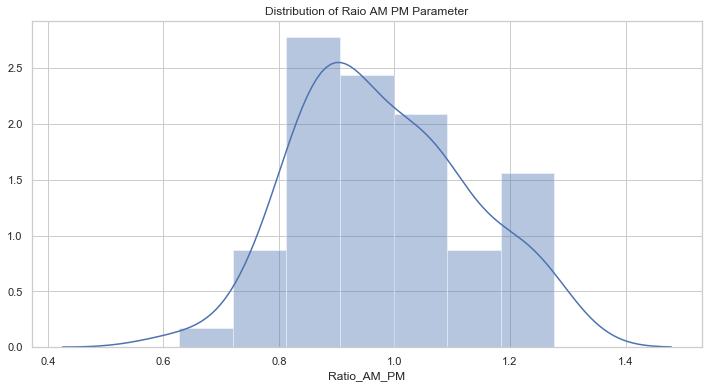

In [68]:
plt.subplots(figsize=(12,6))
sns.boxplot(state_count_merge['Ratio_AM_PM'])
plt.title('Box plot of Ratio of AM and PM' )
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(state_count_merge['Ratio_AM_PM'])
plt.title('Distribution of Raio AM PM Parameter')
plt.show()


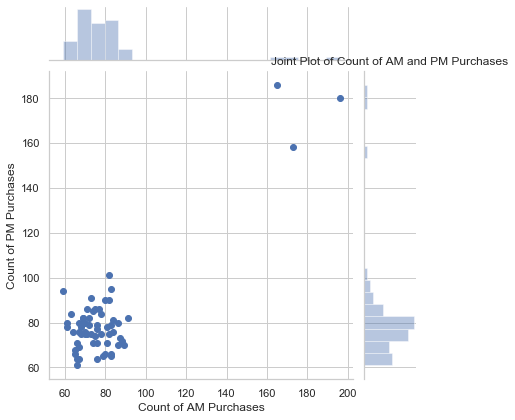

In [69]:
sns.jointplot(data=state_count_merge, x="Count of AM Purchases", y="Count of PM Purchases")
plt.title('Joint Plot of Count of AM and PM Purchases')
plt.show()

#### 4. How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?

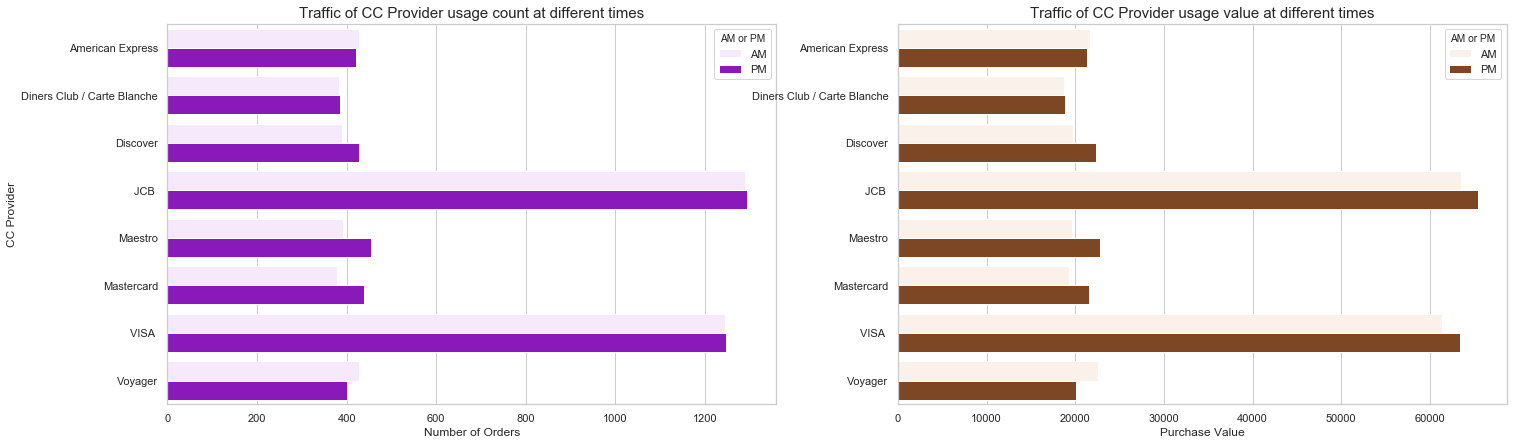

In [63]:
fig, axarr = plt.subplots(1, 2, figsize=(24, 7))
CC_data_hue_cnt = df.groupby(by=['CC Provider','AM or PM'], as_index=False)['Purchase Price'].count()
ax = sns.barplot(y = 'CC Provider', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = CC_data_hue_cnt,\
            color = 'darkviolet', ax=axarr[0])
ax.set(xlabel="Number of Orders", ylabel='CC Provider')
axarr[0].set_title("Traffic of CC Provider usage count at different times", fontsize=15)

CC_data_hue_sum = df.groupby(by=['CC Provider','AM or PM'], as_index=False)['Purchase Price'].sum()
ax = sns.barplot(y = 'CC Provider', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = CC_data_hue_sum,\
            color = 'saddlebrown', ax=axarr[1])
ax.set(xlabel="Purchase Value", ylabel=None)
axarr[1].set_title("Traffic of CC Provider usage value at different times", fontsize=15)
plt.show()


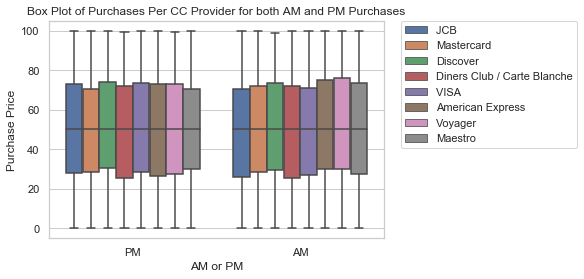

In [62]:
sns.boxplot(x='AM or PM',y='Purchase Price',data=df,hue='CC Provider')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Box Plot of Purchases Per CC Provider for both AM and PM Purchases')
plt.show()

In [70]:
cc_count = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].count()
cc_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
cc_sum = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].sum()
cc_sum.rename(columns = {'Purchase Price':'Total Purchase Value'},inplace=True)
cc_mean = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].mean()
cc_mean.rename(columns = {'Purchase Price':'Avg. Purchase Value'},inplace=True)
cc_count_am = cc_count[cc_count['AM or PM']=='AM']
cc_count_pm = cc_count[cc_count['AM or PM']=='PM']
cc_count_merge = pd.merge(cc_count_am,cc_count_pm,left_on='CC Provider',right_on='CC Provider')
cc_count_merge.rename(columns = {'Count of Purchases_x':'Count of AM Purchases','Count of Purchases_y':'Count of PM Purchases'},inplace=True)
cc_count_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
cc_sum_am = cc_sum[cc_sum['AM or PM']=='AM']
cc_sum_pm = cc_sum[cc_sum['AM or PM']=='PM']
cc_sum_merge = pd.merge(cc_sum_am,cc_sum_pm,left_on='CC Provider',right_on='CC Provider')
cc_sum_merge.rename(columns = {'Total Purchase Value_x':'AM Purchases Value','Total Purchase Value_y':'PM Purchases Value'},inplace=True)
cc_sum_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
cc_merge = pd.merge(cc_count_merge, cc_sum_merge,left_on='CC Provider',right_on='CC Provider')



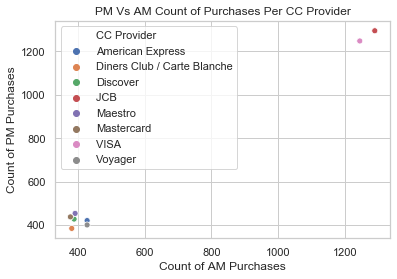

In [71]:
sns.scatterplot(x='Count of AM Purchases',y='Count of PM Purchases',data=cc_merge,hue='CC Provider')
plt.title('PM Vs AM Count of Purchases Per CC Provider')
plt.show()

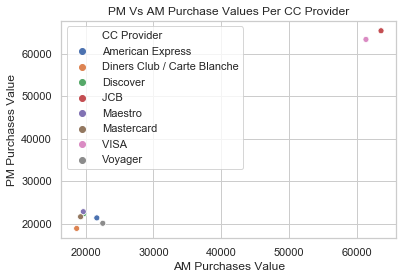

In [72]:
sns.scatterplot(x='AM Purchases Value',y='PM Purchases Value',data=cc_merge,hue='CC Provider')
plt.title('PM Vs AM Purchase Values Per CC Provider')
plt.show()

#### 5. What are top 5 of Job(Professional), CC Provider, Location(State), Email, Language?

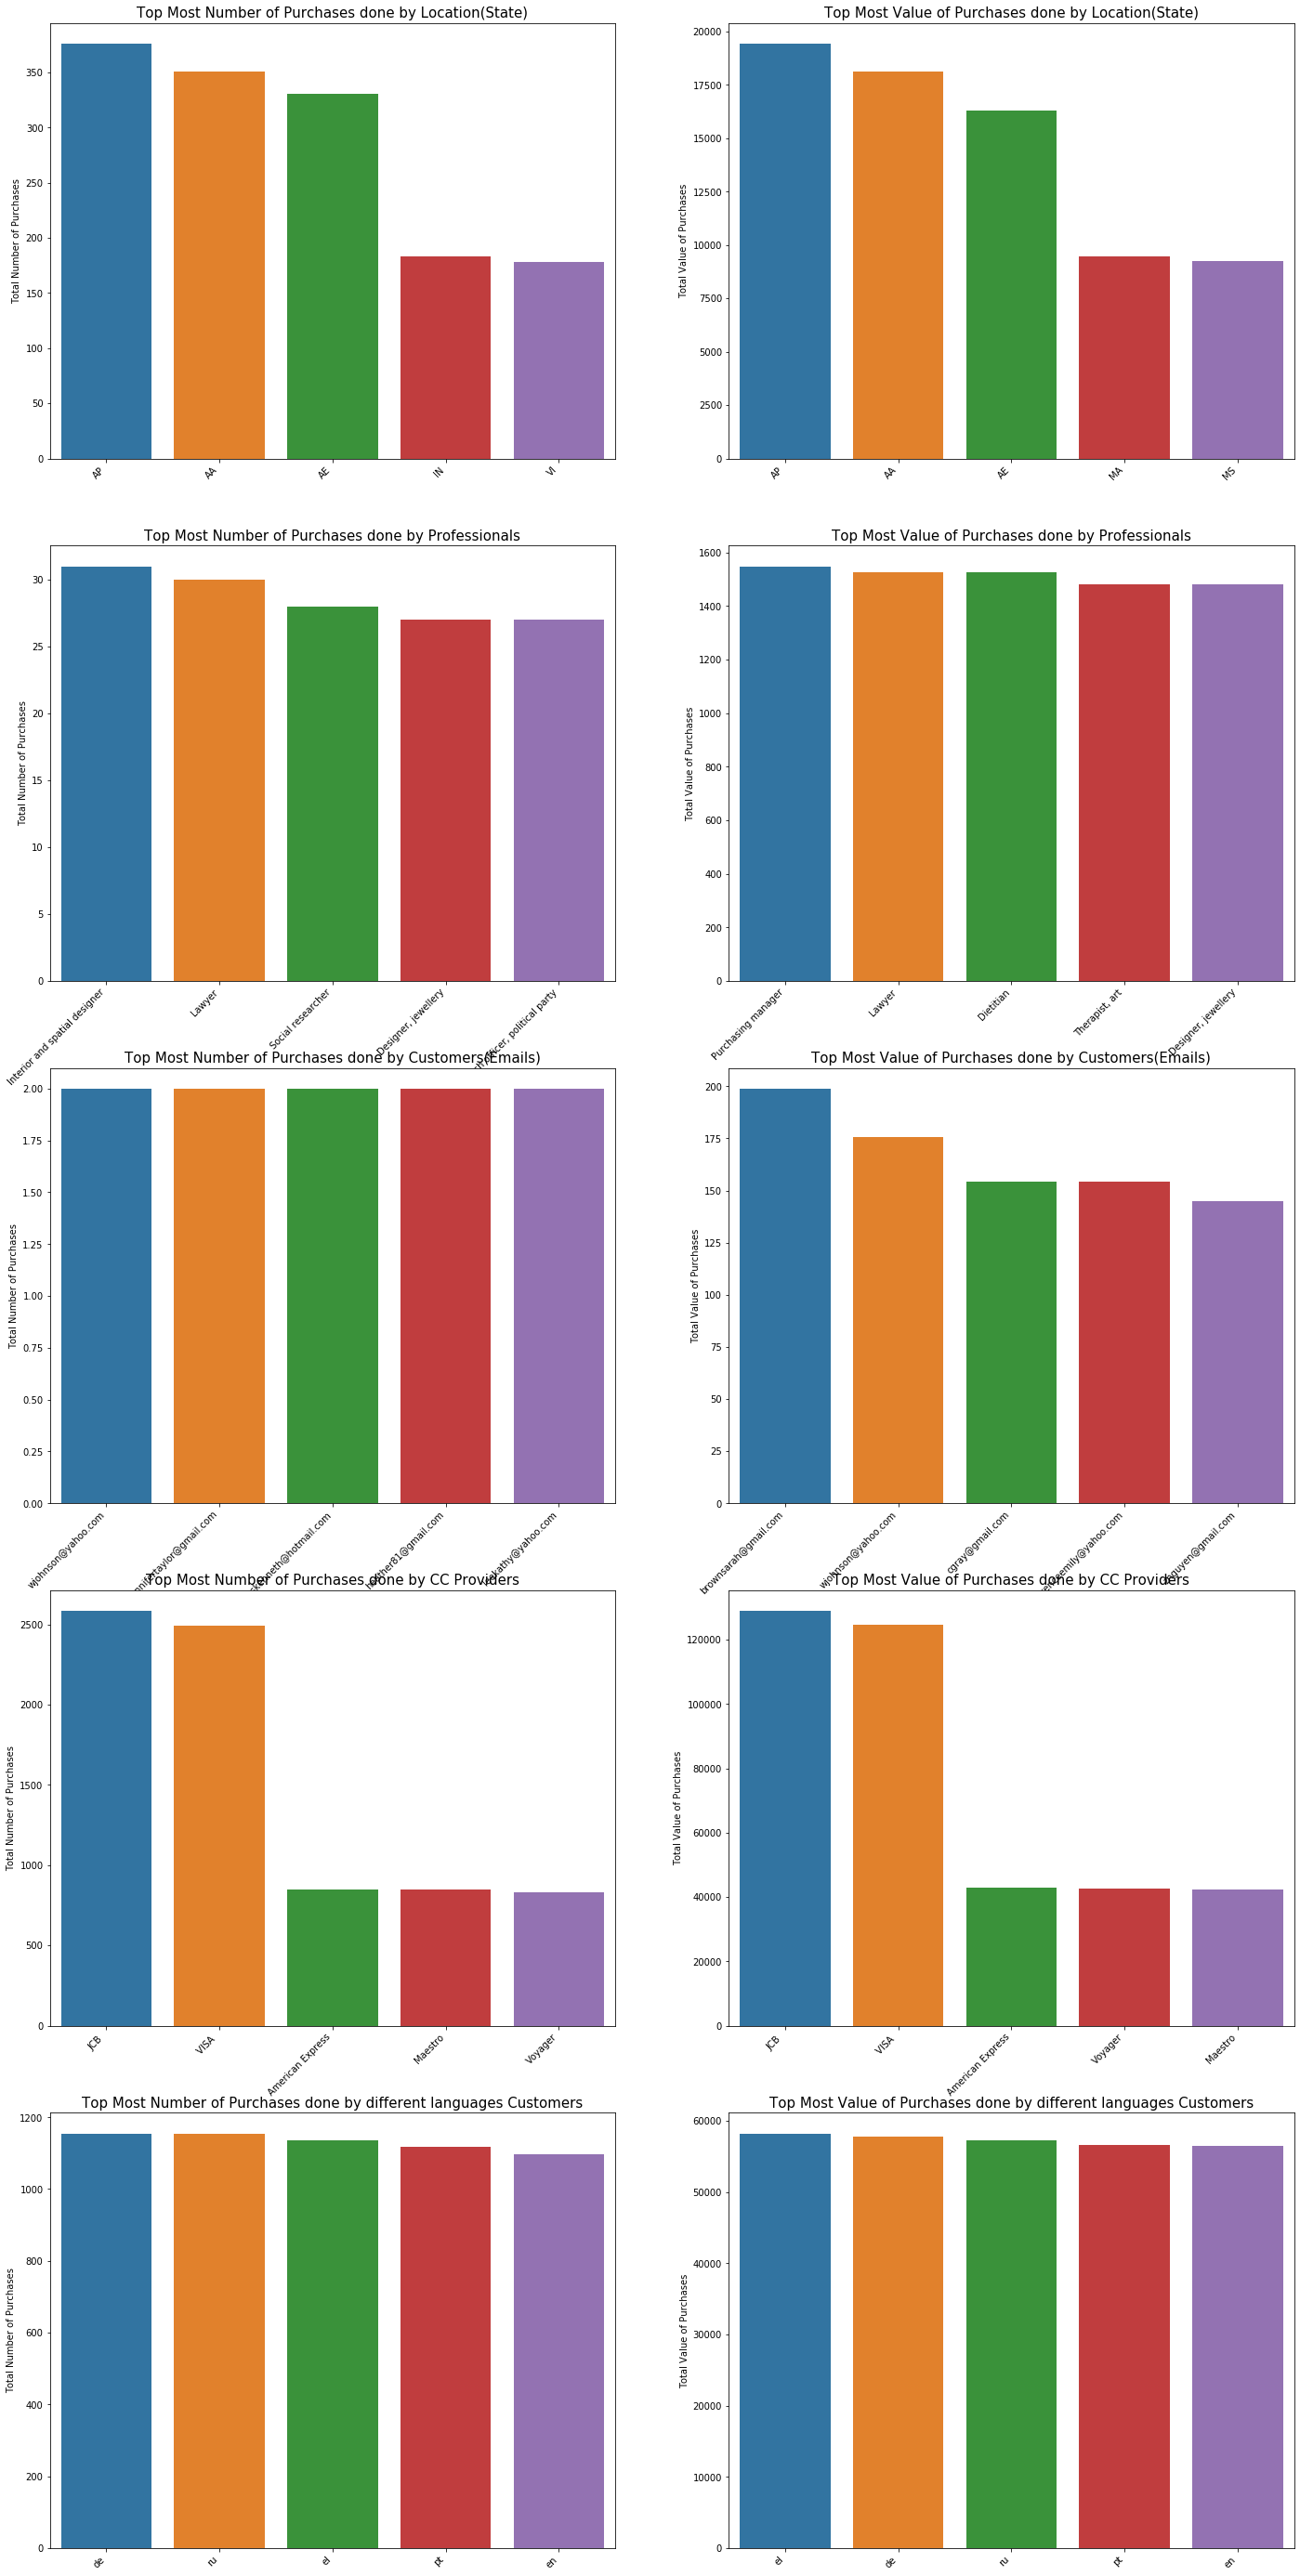

In [37]:
fig, axarr = plt.subplots(5, 2, figsize=(24, 50))
#print('The TOP 5 Locations(state) with number of purchase...')
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "State", y = "Purchase Price", data = res, ax=axarr[0][0])
axarr[0][0].set_title("Top Most Number of Purchases done by Location(State)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 Locations(state) with max amount of purchase...')
res=df.groupby(by='State', as_index=False).sum()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "State", y = "Purchase Price", data = res, ax=axarr[0][1])
axarr[0][1].set_title("Top Most Value of Purchases done by Location(State)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 Professionals with max Number of Purchase...')
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].count()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1, ax=axarr[1][0])
axarr[1][0].set_title("Top Most Number of Purchases done by Professionals", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 Professionals with max Value of purchase...')
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1, ax=axarr[1][1])
axarr[1][1].set_title("Top Most Value of Purchases done by Professionals", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 customers with max Number of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res, ax=axarr[2][0])
axarr[2][0].set_title("Top Most Number of Purchases done by Customers(Emails)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 customers with max Value of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res, ax=axarr[2][1])
axarr[2][1].set_title("Top Most Value of Purchases done by Customers(Emails)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 CC Providers with max Number of purchase...')
res = df.groupby(by=['CC Provider'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "CC Provider", y = "Purchase Price", data = res, ax=axarr[3][0])
axarr[3][0].set_title("Top Most Number of Purchases done by CC Providers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 CC Providers with max Value of purchases...')
res = df.groupby(by=['CC Provider'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "CC Provider", y = "Purchase Price", data = res, ax=axarr[3][1])
axarr[3][1].set_title("Top Most Value of Purchases done by CC Providers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 languages with max Number of purchase...')
res = df.groupby(by=['Language'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Language", y = "Purchase Price", data = res, ax=axarr[4][0])
axarr[4][0].set_title("Top Most Number of Purchases done by different languages Customers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 languages with max Value of purchase...')
res = df.groupby(by=['Language'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Language", y = "Purchase Price", data = res, ax=axarr[4][1])
axarr[4][1].set_title("Top Most Value of Purchases done by different languages Customers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [38]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).count()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
AM or PM,,,,,,,,,,,,,,,,,,,,,
AM,165,173,82,83,196,63,61,74,70,65,...,66,71,69,72,83,65,77,87,71,70
PM,186,158,75,65,180,84,80,71,76,68,...,61,75,82,82,95,66,86,73,86,80


In [39]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).sum()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
AM or PM,,,,,,,,,,,,,,,,,,,,,
AM,8709.453812,8657.028738,3813.164926,4393.341114,10311.870644,3105.848416,2956.823812,3411.441114,3392.296510,3065.223020,...,3218.449208,3296.193812,3903.196510,3697.739208,3753.255718,3676.173812,3890.706510,4254.843812,3770.281114,3679.111114
PM,9396.814926,7641.230322,3731.167624,3103.593020,9108.297624,4009.148416,4326.685718,3268.028416,3621.439208,3330.297624,...,3033.959208,3544.458416,4128.173812,4118.463812,4574.962228,3194.463812,4034.137624,4288.441114,4152.275718,4047.165718


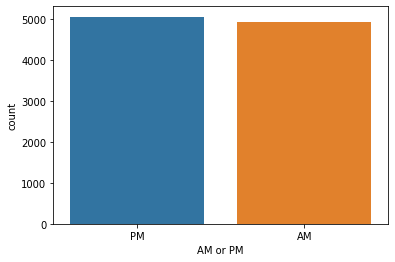

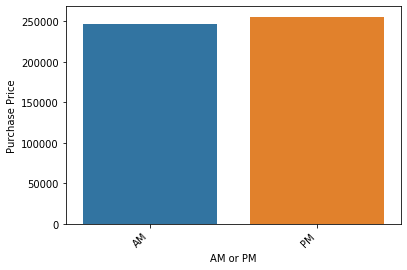

In [40]:

sns.countplot(df['AM or PM'],label='Count')
plt.show()
ax = sns.barplot(y = df.groupby('AM or PM')['Purchase Price'].sum(), x = df.groupby('AM or PM')['Purchase Price'].sum().index)
ax.set(xlabel="AM or PM", ylabel = "Purchase Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Top 5 most purchase done by professionals

In [41]:
print('The TOP 5 customers with max amount of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 customers with max amount of purchase...


,Email,Purchase Price
1084,brownsarah@gmail.com,198.83
9549,wjohnson@yahoo.com,175.61
1342,cgray@gmail.com,154.41
5255,lawrenceemily@yahoo.com,154.31
9918,znguyen@gmail.com,144.73


[Text(0, 0, 'brownsarah@gmail.com'),
 Text(0, 0, 'wjohnson@yahoo.com'),
 Text(0, 0, 'cgray@gmail.com'),
 Text(0, 0, 'lawrenceemily@yahoo.com'),
 Text(0, 0, 'znguyen@gmail.com')]

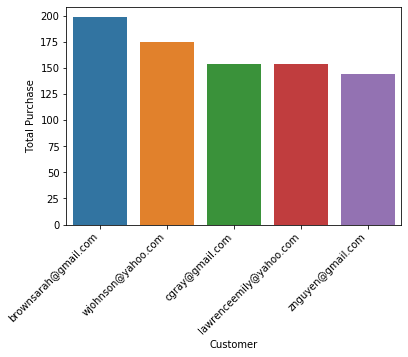

In [42]:
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res)
ax.set(xlabel="Customer", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [43]:
print('The TOP 5 customers with max amount of purchase and their companies')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
pd.merge(df, res, how='inner', on = 'Email')[['Email', 'Company']]



The TOP 5 customers with max amount of purchase and their companies


,Email,Company
0,wjohnson@yahoo.com,Morrison LLC
1,wjohnson@yahoo.com,Weiss-Smith
2,znguyen@gmail.com,Golden-Mitchell
3,znguyen@gmail.com,Rodgers-Kelley
4,cgray@gmail.com,Anderson-Adams
5,cgray@gmail.com,Mills-Mccarty
6,brownsarah@gmail.com,"Nichols, Parrish and Jackson"
7,brownsarah@gmail.com,"Davis, Smith and Horn"
8,lawrenceemily@yahoo.com,"Evans, Sims and Barnes"
9,lawrenceemily@yahoo.com,Johnson Group


Discover patterns for Purchase Price¶

In [44]:
df['Purchase Price'].describe()

count    10000.000000
mean        50.205009
std         27.535415
min          0.000000
25%         27.787500
50%         50.347302
75%         72.640000
max         99.990000
Name: Purchase Price, dtype: float64

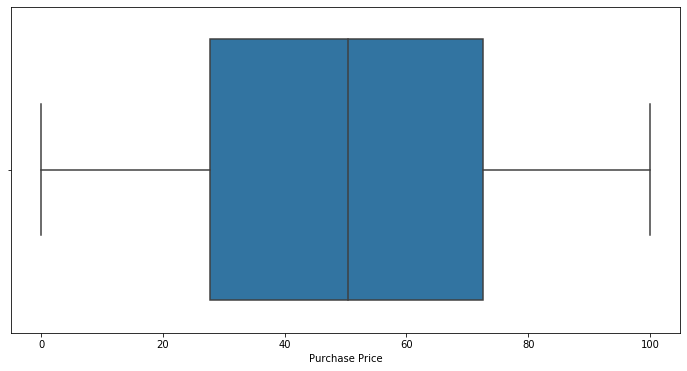

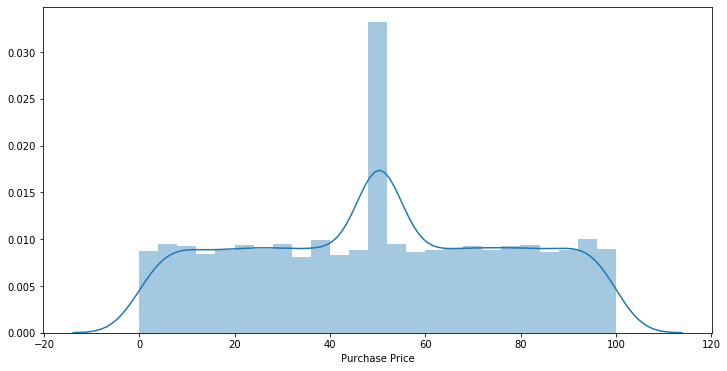

In [45]:
# check the distribution of Purchase price
plt.subplots(figsize=(12,6))
sns.boxplot(df['Purchase Price'])
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(df['Purchase Price'])
plt.show()

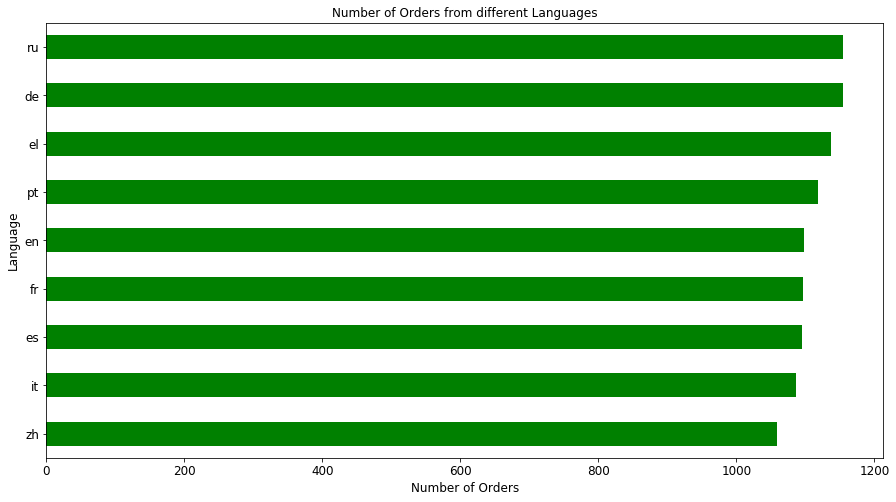

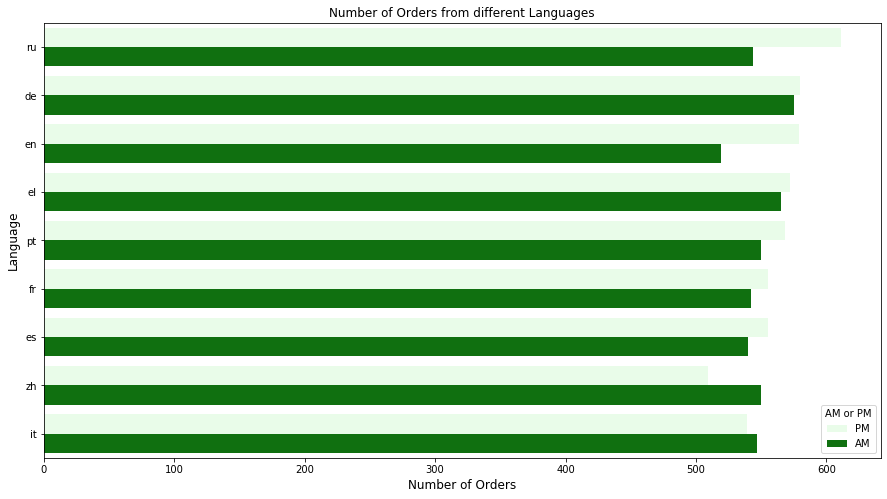

In [46]:
group_language_orders = df.groupby('Language')['Purchase Price'].count().sort_values()

# plot number of unique customers in each Language
plt.subplots(figsize=(15,8))
group_language_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

plt.subplots(figsize=(15,8))
group_language_order_hue = df.groupby(['Language', 'AM or PM'])['Purchase Price'].count().sort_values(ascending = False).reset_index()
sns.barplot(y = 'Language', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = group_language_order_hue,\
            color = 'green' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

Browser Usage Analysis for purchase¶

In [47]:
browser_data = df.groupby(by='Browser', as_index=False)['Purchase Price'].count()
browser_data

,Browser,Purchase Price
0,Mozilla,7924
1,Opera,2076


In [48]:
from matplotlib.pyplot import pie, axis, show
browser_data['Browser']=browser_data['Browser'].map({'Mozilla':0,'Opera':1})

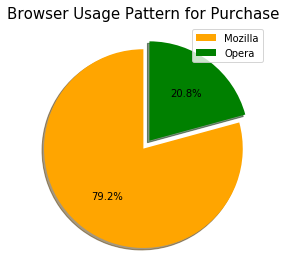

In [49]:
labels = ['Mozilla','Opera']
colors = ['orange', 'green'] 
explode =(0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,4)) 
ax1.pie(browser_data['Purchase Price'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
plt.title('Browser Usage Pattern for Purchase', fontsize = 15) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()


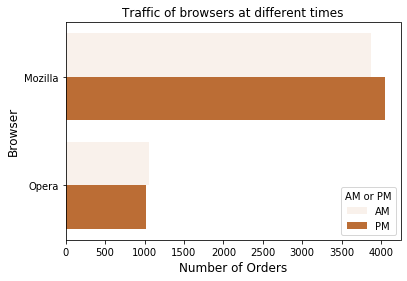

In [50]:
browser_data_hue = df.groupby(by=['Browser','AM or PM'], as_index=False)['Purchase Price'].count()
sns.barplot(y = 'Browser', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = browser_data_hue,\
            color = 'chocolate' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Browser', fontsize=12)
plt.title('Traffic of browsers at different times', fontsize=12)
plt.show()

In [51]:
print('The TOP 5 Companies with max amount of purchase...')
res = df.groupby(by=['Company'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 Companies with max amount of purchase...


,Company,Purchase Price
805,Brown Ltd,733.631906
8303,Williams LLC,678.557302
7166,Smith LLC,644.027302
7168,Smith PLC,628.987302
7164,Smith Group,610.297302


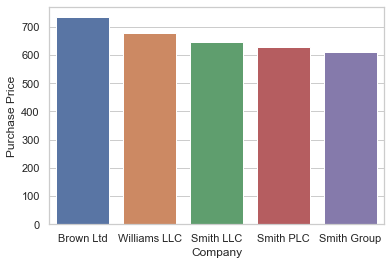

In [52]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Company", y="Purchase Price", data=res)

In [53]:
#res.iplot(kind='bar', x="Company", y="Purchase Price", color='green')


In [54]:
#All jobs registered
df['Job'].value_counts().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Purchasing manager', 'Research officer, political party',
       'Designer, jewellery', 'Designer, fashion/clothing', 'Dietitian',
       'Social worker', 'Special educational needs teacher',
       ...
       'Exhibitions officer, museum/gallery', 'Child psychotherapist',
       'Music therapist', 'Special effects artist', 'Prison officer',
       'Stage manager', 'Editor, film/video', 'Actuary', 'Investment analyst',
       'Information systems manager'],
      dtype='object', length=623)

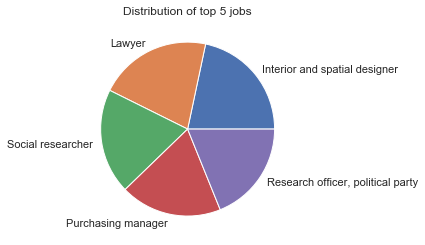

In [55]:
plt.pie(df['Job'].value_counts().head(), labels = df['Job'].value_counts().head().index )
plt.title('Distribution of top 5 jobs')
plt.show()

In [56]:
df['Job'].value_counts().head().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Purchasing manager', 'Research officer, political party'],
      dtype='object')

In [57]:
df['CC Provider'].str.split(pat = '\d', expand = True)[0].unique()#Find the 10 credit card providers

array(['JCB ', 'Mastercard', 'Discover', 'Diners Club / Carte Blanche',
       'VISA ', 'American Express', 'Voyager', 'Maestro'], dtype=object)

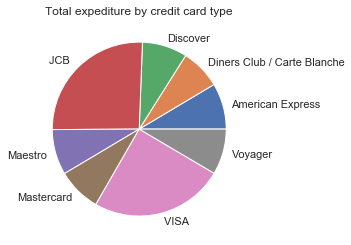

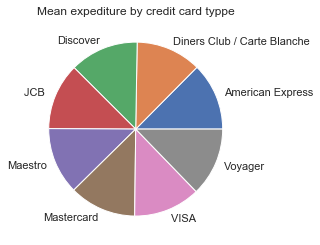

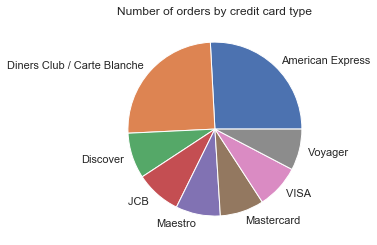

In [58]:
df['CC Provider'] = df['CC Provider'].str.split(pat = '\d', expand = True)[0]

cctotal = df.groupby('CC Provider')['Purchase Price'].sum()
ccmean = df.groupby('CC Provider')['Purchase Price'].mean()
ccorder = df['CC Provider'].value_counts()
ccindex = df.groupby('CC Provider')['Purchase Price'].mean().index
ccorder = df['CC Provider'].value_counts()

plt.pie(cctotal, labels = ccindex )
plt.title('Total expediture by credit card type')
plt.show()

plt.pie(ccmean, labels = ccindex )
plt.title('Mean expediture by credit card typpe')
plt.show()

plt.pie(ccorder, labels = ccindex )
plt.title('Number of orders by credit card type')
plt.show()


In [59]:
#Users with expired credit cards
exp = cleaned_ecom[(cleaned_ecom['CC Exp Year'] < 20) & (cleaned_ecom['CC Exp Month'] < 9)]
print("No of Users with expired cards ", exp['Email'].nunique())

No of Users with expired cards  2022
